# EATS PL Report - Satellites
Template by André Moitinho

***

### Student number: 61424
### Name: Luís Leitão

***

<div class="alert alert-block alert-info">
    
## Instructions

* Fill in your name and number above
* This template provides blocks of instructions that guide you through the activity and report. Put your codes and comments below the corresponding blocks. 
* Add as many code and markdown cells as necessary. 
* The blue background colour in the markdown cells (like this one) is reserved for the instruction blocks. Use white cells for your comments.
* Write a clear report:
    * Provide justifications and comments.
    * Figures and labels (legends, axes, etc) should be easy to read.
    * Tables should be neatly formatted and include labels.

**To submit your report:**

You will need to have the nbconvert[webpdf] package installed for saving to pdf. <br>
Anaconda: conda install -c conda-forge nbconvert-webpdf <br>
General: pip install nbconvert[webpdf]
    
* Clean up and make sure all works well: In the "Kernel" menu select "Restart & Run All" (or use the "fast forward/double arrow" icon). Wait until the process is completed
* Save to a pdf file:
    * JupyterNotebook users: In the "File" menu -> "Download As" -> "**PDF via HTML (.html)**". 
    * JupyterLab users: In the "File" menu -> "Save and Export Notebook As" -> "**Webpdf**".
* Check that the PDF file is fine (no truncated lines, nothing missing, etc)
* Name the file: NumberFirstnameLastname.pdf* (e.g. 10101ClaudeShannon.pdf)
* Upload the pdf file to the "PL Report - Satellites" assignement area. 

### Tips
* Run a cell  - keyboard shortcut: shift-enter
* To create "markdown" cells like this one, For comments, not for code: create a new cell. In the menu above to the right of the "fast-forward" icon there's a dropdown button with the default value "Code". Change to "Markdown".
* To display an image from a file on disk (e.g. image.png): In a **markdown cell** you can use *\!\[some text\](image.png)*, or simply drag and drop!
</div>

---

<div class="alert alert-block alert-info">  

## Setup
Put all your imports (e.g. ephem, numpy, matplotlib, etc)  in the cell bellow
</div>


In [41]:
# Importing necessary libraries for data manipulation, visualization, and astronomy computations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ephem
import datetime
from pathlib import Path
import csv

# Additional imports for 3D plotting and ignoring warnings
from mpl_toolkits.mplot3d import Axes3D 
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">  

## <center>PART 1 -  Orbital elements basics </center>


In this first exercise, you'll import a _Three Line Element_ (TLE) for an Earth satellite, propagate its orbit with SGP4 (Simplified perturbations models) implemented in _ephem_ and plot the results. In the process you will see which methods and attributes are provided by _ephem_ for dealing with Earth satellites and their observation.

---

### Set observer's coordinates and time

Start by setting the observer's coordinates and time in an _ephem Observer_ object. Say which place and time you chose.
    
</div>

Bissau, 1/11/2023 at midnight

In [42]:
# Creating an observer object
Obs = ephem.Observer()

# Setting the observer's latitude and longitude 
# Value inserted in degrees but modified to radians
Obs.lat = np.deg2rad(11.8632)
Obs.long = np.deg2rad(-15.5843)

# Setting the observer's date to November 1, 2023
Obs.date = datetime.datetime(2023, 11, 1)


<div class="alert alert-block alert-info">  
    
What attributes and methods does the _Observer_ object provide? Use the "help" command and show the output

</div>

In [43]:
# Print documentation for Obs object
help(Obs)

Help on Observer in module ephem object:

class Observer(_libastro.Observer)
 |  A location on earth for which positions are to be computed.
 |
 |  An `Observer` instance allows you to compute the positions of
 |  celestial bodies as seen from a particular latitude and longitude on
 |  the Earth's surface.  The constructor takes no parameters; instead,
 |  set its attributes once you have created it.  Defaults:
 |
 |  `date` - the moment the `Observer` is created
 |  `lat` - zero latitude
 |  `lon` - zero longitude
 |  `elevation` - 0 meters above sea level
 |  `horizon` - 0 degrees
 |  `epoch` - J2000
 |  `temp` - 15 degrees Celsius
 |  `pressure` - 1010 mBar
 |
 |  Method resolution order:
 |      Observer
 |      _libastro.Observer
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __copy__ = copy(self)
 |
 |  __repr__(self)
 |      Return a useful textual representation of this Observer.
 |
 |  compute_pressure(self)
 |      Set the atmospheric pressure for the current ele

<div class="alert alert-block alert-info">  

### Read a TLE

From the TLE file provided for this exercise, select a satellite and load its orbital elements into an ephem _EarthSatellite_ object (readtle).

</div>

In [44]:
# Loading the data for the satellite PoSAT-1, the first portuguese satelitte
l1 = '0 POSAT 1'
l2 = '1 22829U 93061G   23310.87237115  .00000382  00000-0  16142-3 0  9995'
l3 = '2 22829  98.8010 356.5313 0008895 311.1653  48.8762 14.31351700571640'


# Creating an object with the TLE data
EarthSatellite = ephem.readtle(l1,l2,l3)

<div class="alert alert-block alert-info">  
    
What attributes and methods does the _EarthSatellite_ object provide? Use the "help" command and show the output

</div>

In [45]:
# Print documentation for the EarthSatellite class
help(EarthSatellite)

Help on EarthSatellite object:

class EarthSatellite(Body)
 |  A satellite in orbit around the Earth, usually built by passing the text of a TLE entry to the `ephem.readtle()` routine. You can read and write its orbital parameters through the following attributes:
 |
 |  _ap -- argument of perigee at epoch (degrees)
 |  _decay -- orbit decay rate (revolutions per day-squared)
 |  _drag -- object drag coefficient (per earth radius)
 |  _e -- eccentricity
 |  _epoch -- reference epoch (mjd)
 |  _inc -- inclination (degrees)
 |  _M -- mean anomaly (degrees from perigee at epoch)
 |  _n -- mean motion (revolutions per day)
 |  _orbit -- integer orbit number of epoch
 |  _raan -- right ascension of ascending node (degrees)
 |
 |  Method resolution order:
 |      EarthSatellite
 |      Body
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  -------------------------------

<div class="alert alert-block alert-info">  
    
List the attributes and methods in the _EarthSatellite_  by directly inspecting its contents with the _dir_ instruction.
    
</div>

In [46]:
# Our TLE was stored in the "EarthSatellite" object
attributes = dir(EarthSatellite)
print(attributes)

['M', '_M', '__class__', '__copy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'ap', 'az', 'catalog_number', 'circumpolar', 'compute', 'copy', 'dec', 'decay', 'drag', 'e', 'eclipsed', 'elevation', 'elong', 'epoch', 'g_dec', 'g_ra', 'ha', 'inc', 'mag', 'n', 'name', 'neverup', 'orbit', 'parallactic_angle', 'ra', 'raan', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'writedb']


<div class="alert alert-block alert-info">  
    
### Orbit integration.
    
Our goal is to visualise the satellite's positions (alititude and azimuth) for an array of times.

1. Create an array of times spanning a whole day
2. Compute the orbits for each time in the array


</div>


In [47]:
# Setting the initial date to November 7, 2023, midnight
date = datetime.datetime(2023, 11, 7, 0)

# Setting the time step to 1 minute
# 1 minute in order to smooth the trajectory line
step = datetime.timedelta(minutes=1)

# Generating a list of 1440 datetime points with 1-minute intervals, ranging all day
points = []
for i in range(1440):
    points.append(date)
    date = date + step

# Lists to store satellite orbit information needed
alt = []      # Altitude
az = []       # Azimuth 


# Loop through each datetime point
for i in points:
    # Set the observer's date to the current datetime point
    Obs.date = i
    
    # Compute the satellite orbit for the given observer's date
    EarthSatellite.compute(Obs)
    
    # Append computed values to their respective lists
    az.append(np.rad2deg(EarthSatellite.az))    # Convert azimuth to degrees
    alt.append(np.rad2deg(EarthSatellite.alt))  # Convert altitude to degrees
  

# print(points)
# print(alt)
# print(az)
# print(ele)
# print(a_epoch)

<div class="alert alert-block alert-info">  

### Plot the satellite tracks for the times and positions you have computed above

1. Atitude vs time
2. Azimuth vs time
3. Satellite track in polar coordinates

Make sure the plots are easily seen together (no scrolling!)
</div>


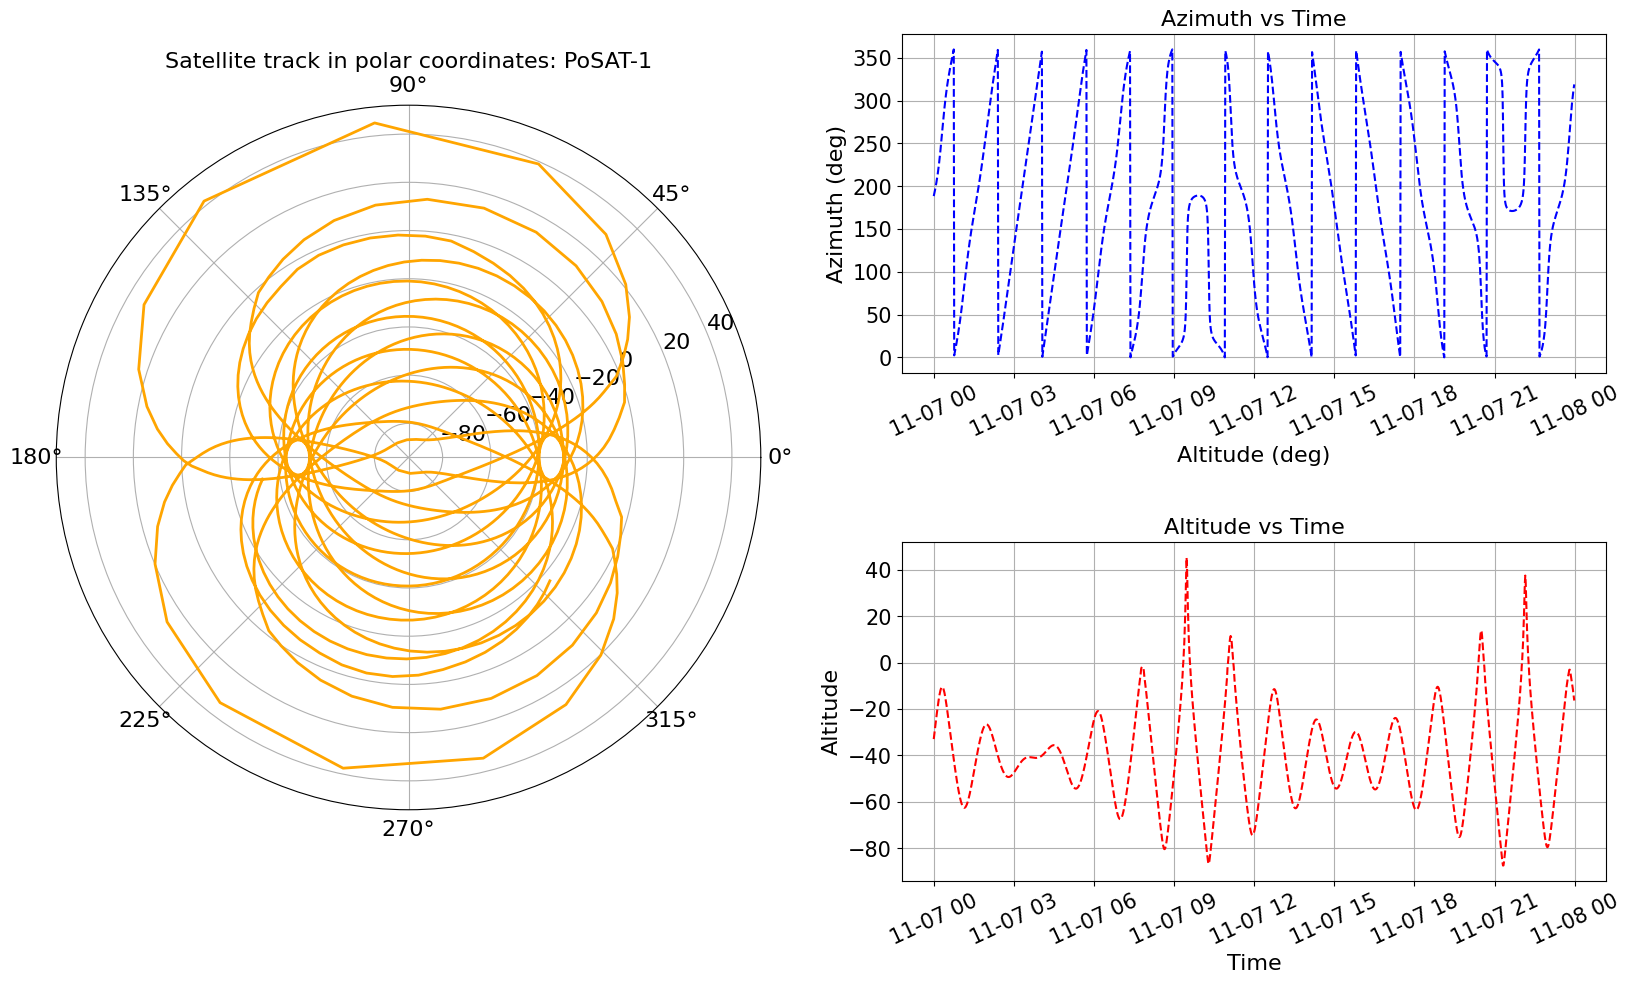

In [48]:
# Creating a figure
fig = plt.figure(figsize=(20, 11))
fig.subplots_adjust(hspace=.5)

# Plotting Altitude vs Time
ax1 = fig.add_subplot(224)
ax1.plot(points, alt, '--', color='red')
ax1.set_ylabel('Altitude', fontsize=16)
ax1.set_xlabel('Time', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.grid(True)
plt.xticks(rotation=25)
ax1.set_title("Altitude vs Time", fontsize=16)

# Plotting Azimuth vs Time
ax2 = fig.add_subplot(222)
ax2.plot(points, az, '--', color='blue')
ax2.set_ylabel('Azimuth (deg)', fontsize=16)
ax2.set_xlabel('Altitude (deg)', fontsize=16)
ax2.set_title("Azimuth vs Time", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2.grid(True)
plt.xticks(rotation=25)

# Polar Plot
ax3 = fig.add_subplot(121, projection="polar")
ax3.plot(np.deg2rad(az), alt, color="orange", lw=2) # azimuth in radians because that is the right input to the polar plot
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax3.grid(True)
ax3.set_title("Satellite track in polar coordinates: PoSAT-1", fontsize=16)


plt.show()

We can see that this satellite completes about 14 turns around the Earth in 24 hours.


<div class="alert alert-block alert-info">  


## <center>PART 2 -  Processing TLEs on the large scale </center>

Here is where you process the whole TLE file, propagate orbits, compute 3D cartesian positions of the satellites and write the output to a file for opening in other analsys software. 

Below, I provide a utility function for reading the TLE file into a list of _EarthSatellite_ objects. It is for you to understand how the function works or use another method.

</div>


In [49]:
# Auxiliary function for reading 3LE files

def loadTLE(filename):
    """ Loads a TLE file and creates a list of satellites."""
    f = open(filename)
    satlist = []
    l1 = f.readline()
    while l1:
        l2 = f.readline()
        l3 = f.readline()
        sat = ephem.readtle(l1,l2,l3)
        satlist.append(sat)
        l1 = f.readline()

    f.close()
    print("%i satellites loaded into list"%len(satlist))
    return satlist

<div class="alert alert-block alert-info">  


### Read a TLE file

Read the TLEs from the file provided for this activity into a list of _EarthSatellite_ objects

</div>


In [50]:
# Set-up objects' list
objlist = loadTLE('SpaceTrack_3le_07112023.txt')

25875 satellites loaded into list


<div class="alert alert-block alert-info">  

### Compute orbits and create arrays of X,Y,Z cartesian positions relative to the centre of the Earth of the objects read above

The computations are for one fixed date of your choice. You may use the observer and a date defined in the beginning of the report, or set a new location and date (clearly indicated).

Sometimes, _ephem_ will not compute the positions and exits with an error. This is often due to the old date of some TLEs. To overcome this unwanted termination, you will have to capture those exceptions and eliminate the problematic satellites from the list. Print on the screen the names of the satellites that have been discarded.

</div>


In [51]:
# Compute orbits for the objects in the TLE file
# Determine their X,Y,Z cartesian positions relative to the Earth.

XX, YY, ZZ = [], [], []


for i in range(0, len(objlist)):

    try:
        objlist[i].compute(Obs)
    except ValueError:
        print("%i deleted %s: cannot compute the body's position at %s" % (i,objlist[i].name,Obs.date))

    try:
        radius = ephem.earth_radius + objlist[i].elevation
        X = radius * np.cos(objlist[i].sublong) * np.cos(objlist[i].sublat)
        Y = radius * np.sin(objlist[i].sublong) * np.cos(objlist[i].sublat)
        Z = radius * np.sin(objlist[i].sublat)
    except RuntimeError:
        print("%i deleted %s: cannot compute the body's position at %s" % (i,objlist[i].name,Obs.date))
        X=Y=Z = float('nan')
             
    XX.append(X)
    YY.append(Y)
    ZZ.append(Z)


XX = np.array(XX)
YY = np.array(YY)
ZZ = np.array(ZZ)


17062 deleted 0 LEMUR 2 DJUPROERA: cannot compute the body's position at 2023/11/7 23:59:00


<div class="alert alert-block alert-info">  


### Plot cartesian XYZ positions in 3D

There are some outliers at great distances. Get rid of them to provide a good view of the LEO and GEO environments.

Note: You might get some warnings which can be safely muted with:
np.warnings.filterwarnings('ignore')

</div>


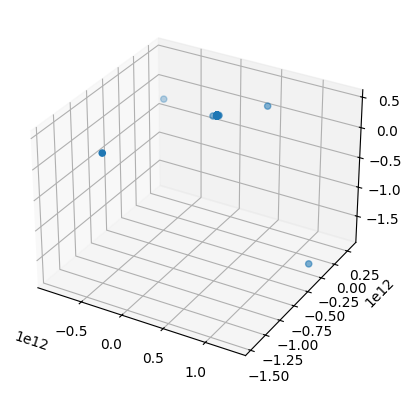

In [52]:
# Create a new 3D plot with all the data in objlist

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(XX,YY,ZZ)

On the previous graph we have a scale problem. Due to some outliers, it is not possible to properly see the location of the satellites that are orbiting the Earth. To solve this, I'm going to filter the satellites, checking only the ones at a distance below 50000 km from the Earth. This distance is high enough to observe satellites in the GEO region (more a less at 35000 km).

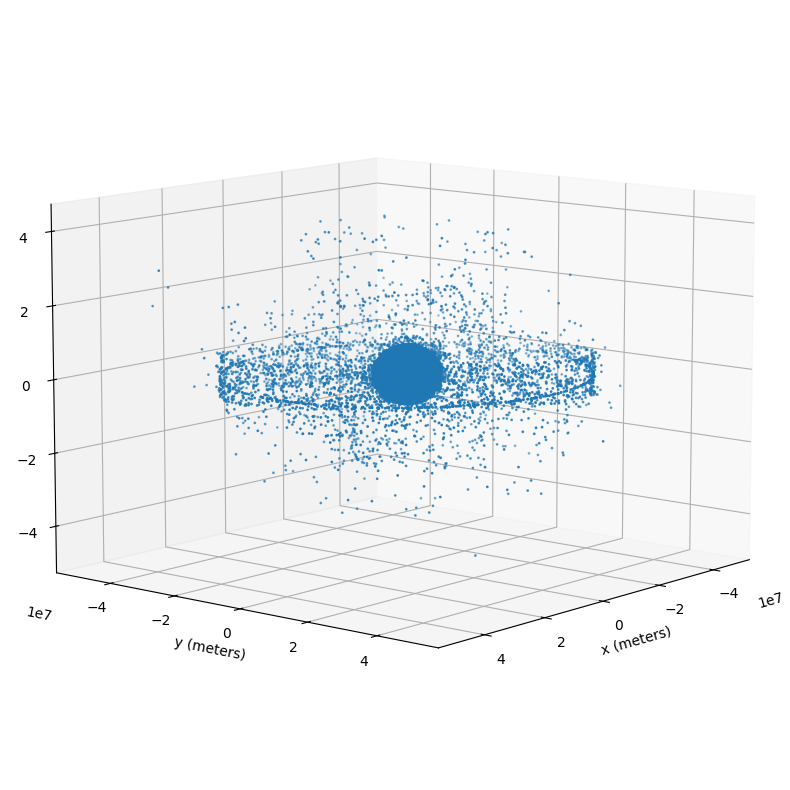

In [53]:
# Set a maximum distance and create a mask for filtering 
maxrad = 5.0e7 #meter
mask = (abs(XX) < maxrad) & (abs(YY) < maxrad) & (abs(ZZ) < maxrad) 

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
# s=1: small marks
ax.scatter3D(XX[mask],YY[mask],ZZ[mask], s = 1)
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.view_init(10,40)

<div class="alert alert-block alert-info">  


### Export results to a csv file

You were able to do a 3D plot showing the Earth's orbital environments. That was nice. But now we want to export the data to a file to continue exploring them with more specialised interactive visualisation software. 

For that, export the data from the orbit computation, as well as X,Y,Z to a CSV file. Include a header identifying the columns listed.  

Note: You may also make the header more human friendy by changing the names in some fields (e.g. _n -> mean motion). Remember that the "help" instruction provides a description of the variables.

</div>


In [54]:
# Print attributes and methods of our satellite
attrlist=dir(objlist[0])
print(attrlist)

['M', '_M', '__class__', '__copy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'ap', 'az', 'catalog_number', 'circumpolar', 'compute', 'copy', 'dec', 'decay', 'drag', 'e', 'eclipsed', 'elevation', 'elong', 'epoch', 'g_dec', 'g_ra', 'ha', 'inc', 'mag', 'n', 'name', 'neverup', 'orbit', 'parallactic_angle', 'ra', 'raan', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'writedb']


In [55]:
# Array with attributes to export
attrlist = ['_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 
               'a_epoch', 'a_ra', 'alt', 'az', 'catalog_number', 'circumpolar', 'dec', 'eclipsed', 
               'elevation', 'elong', 'g_dec', 'g_ra', 'mag', 'name', 'neverup', 'ra', 'radius', 'range', 
               'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 
               'transit_alt', 'transit_time']

# Create the "header" array
header = attrlist.copy()
header.append('X')
header.append('Y')
header.append('Z')
print(header)

['_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'az', 'catalog_number', 'circumpolar', 'dec', 'eclipsed', 'elevation', 'elong', 'g_dec', 'g_ra', 'mag', 'name', 'neverup', 'ra', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'X', 'Y', 'Z']


In [56]:
# Update attributes's names to make them more human readable

#help(EarthSatellite)

header[0:14] = ['PerigeeEpoch(deg)',                                                        # _ap
                'DecayRate(rev/day^2)',                                                     # _decay                         
                'DragCoef',                                                                 # _drag
                'Eccentricity',                                                             # _e
                'ReferenceEpoch(mjd)',                                                      # _epoch
                'Inclination(deg)',                                                         # _inc
                'MeanMotion(rev/day)',                                                      # _n
                'OrbitNumber',                                                              # _orbit
                'RightAscensionOfAscendingNode(deg)',                                       # _raan
                'AstrometricGeocentricDeclination',                                         # a_dec
                'EquinoxAstrometricRightAscension+Declination',                             # a_epoch
                'AstrometricGeocentricRightAscension',                                      # a_ra
                'Altitude',                                                                 # alt
                'Azimute']                                                                  # az 
header[16] = 'Declination'                                                                  # dec
header[19:28] = ['ApparentGeocentricDeclination',                                           # g_dec
                 'ApparentGeocentricRightAscension',                                        # g_re
                 'Magnitude',                                                               # mag
                 'ObjectName',                                                              # name
                 'NeverUp',                                                                 # neverup
                 'RightAscension',                                                          # ra
                 'VisualRadius',                                                            # radius
                 'DistanceFromObserver2Satellite(m)']                                       # range

print(header)

['PerigeeEpoch(deg)', 'DecayRate(rev/day^2)', 'DragCoef', 'Eccentricity', 'ReferenceEpoch(mjd)', 'Inclination(deg)', 'MeanMotion(rev/day)', 'OrbitNumber', 'RightAscensionOfAscendingNode(deg)', 'AstrometricGeocentricDeclination', 'EquinoxAstrometricRightAscension+Declination', 'AstrometricGeocentricRightAscension', 'Altitude', 'Azimute', 'catalog_number', 'circumpolar', 'Declination', 'eclipsed', 'elevation', 'ApparentGeocentricDeclination', 'ApparentGeocentricRightAscension', 'Magnitude', 'ObjectName', 'NeverUp', 'RightAscension', 'VisualRadius', 'DistanceFromObserver2Satellite(m)', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'X', 'Y', 'Z']


In [57]:
# Open the file for writing
resultFile = open("XYZtle_07112023.csv",'w')
wr = csv.writer(resultFile, delimiter=',')

# Write the header
wr.writerow(header)

609

In [58]:
# Write the data. Don't forget to include X, Y and Z

# iterate over the objects
for i in range(0, len(objlist)):
    outline = []
    # fill the output line by iterating over the object's attributes
    for attr in attrlist:
        try:
            a = getattr(objlist[i], attr)
        except RuntimeError:
            a = (float('nan'))
        try:
            outline.append(float(a))
        except ValueError:
            outline.append(a)
        except TypeError:
            outline.append(float('nan'))

    # append the computed XYZ (example using extend instead of append)
    outline.extend((XX[i], YY[i], ZZ[i]))  
    # write the line for this object
    wr.writerow(outline)

# close the output file
resultFile.close() 

<div class="alert alert-block alert-info">  

Check all went fine: Print the header and first lines to the screen
</div>


In [59]:
# Open result file
resultFile = open("XYZtle_07112023.csv",'r')

# Print header and first 5 data lines
for i in range(6):
    print(resultFile.readline())

print()

PerigeeEpoch(deg),DecayRate(rev/day^2),DragCoef,Eccentricity,ReferenceEpoch(mjd),Inclination(deg),MeanMotion(rev/day),OrbitNumber,RightAscensionOfAscendingNode(deg),AstrometricGeocentricDeclination,EquinoxAstrometricRightAscension+Declination,AstrometricGeocentricRightAscension,Altitude,Azimute,catalog_number,circumpolar,Declination,eclipsed,elevation,ApparentGeocentricDeclination,ApparentGeocentricRightAscension,Magnitude,ObjectName,NeverUp,RightAscension,VisualRadius,DistanceFromObserver2Satellite(m),range_velocity,rise_az,rise_time,set_az,set_time,size,sublat,sublong,transit_alt,transit_time,X,Y,Z

2.7769148202486647,4.850000095757423e-06,0.0006167599931359291,0.18433499336242676,45234.74765951,0.597752565359765,10.85107214,33969.0,0.3041323639862901,-0.08757802423929698,36525.0,0.04733181223255216,1.0027410984039307,4.199487686157227,5.0,0.0,-0.08526329511548547,1.0,3649377.0,0.0,0.09569388064260637,0.3514457599368872,2.0,0 VANGUARD 1,0.0,0.05265589515472485,0.0,4045700.25,-2216.45

<div class="alert alert-block alert-info">  


### Quick analyis with TOPCAT

* Open the csv file in TOPCAT
* Make a 3D plot of X,Y,Z to show the LEO/MEO/GEO environments
* Make a (2D) scatter plot of eccentricity vs mean_motion
* Create a subset of the data by selecting a region you find interesting in the 2D plot
* Show how this subset appears distributed in the 3D plot
* Take a screenshot of your Desktop with the TOPCAT plots clearly seen and display it in the markdown cell below (double click on the example image from Gaia DR3)

</div>

In the next figure it's possible to see the 3D distribution of satellites around the earth. In this graphic, only the satellites LEO (yellow), MEO (grey) and GEO (red) are visible, not all the satellites present in the file "XYZtle_07112023.csv."

In the case of GEO region, we can see some selected points that do not belong to the expected geostationary orbit but end up being included in the "freehand" outline of points, perhaps due too poor handling.


![Screenshot 2023-12-10 at 18.31.33.png](<attachment:Screenshot 2023-12-10 at 18.31.33.png>)
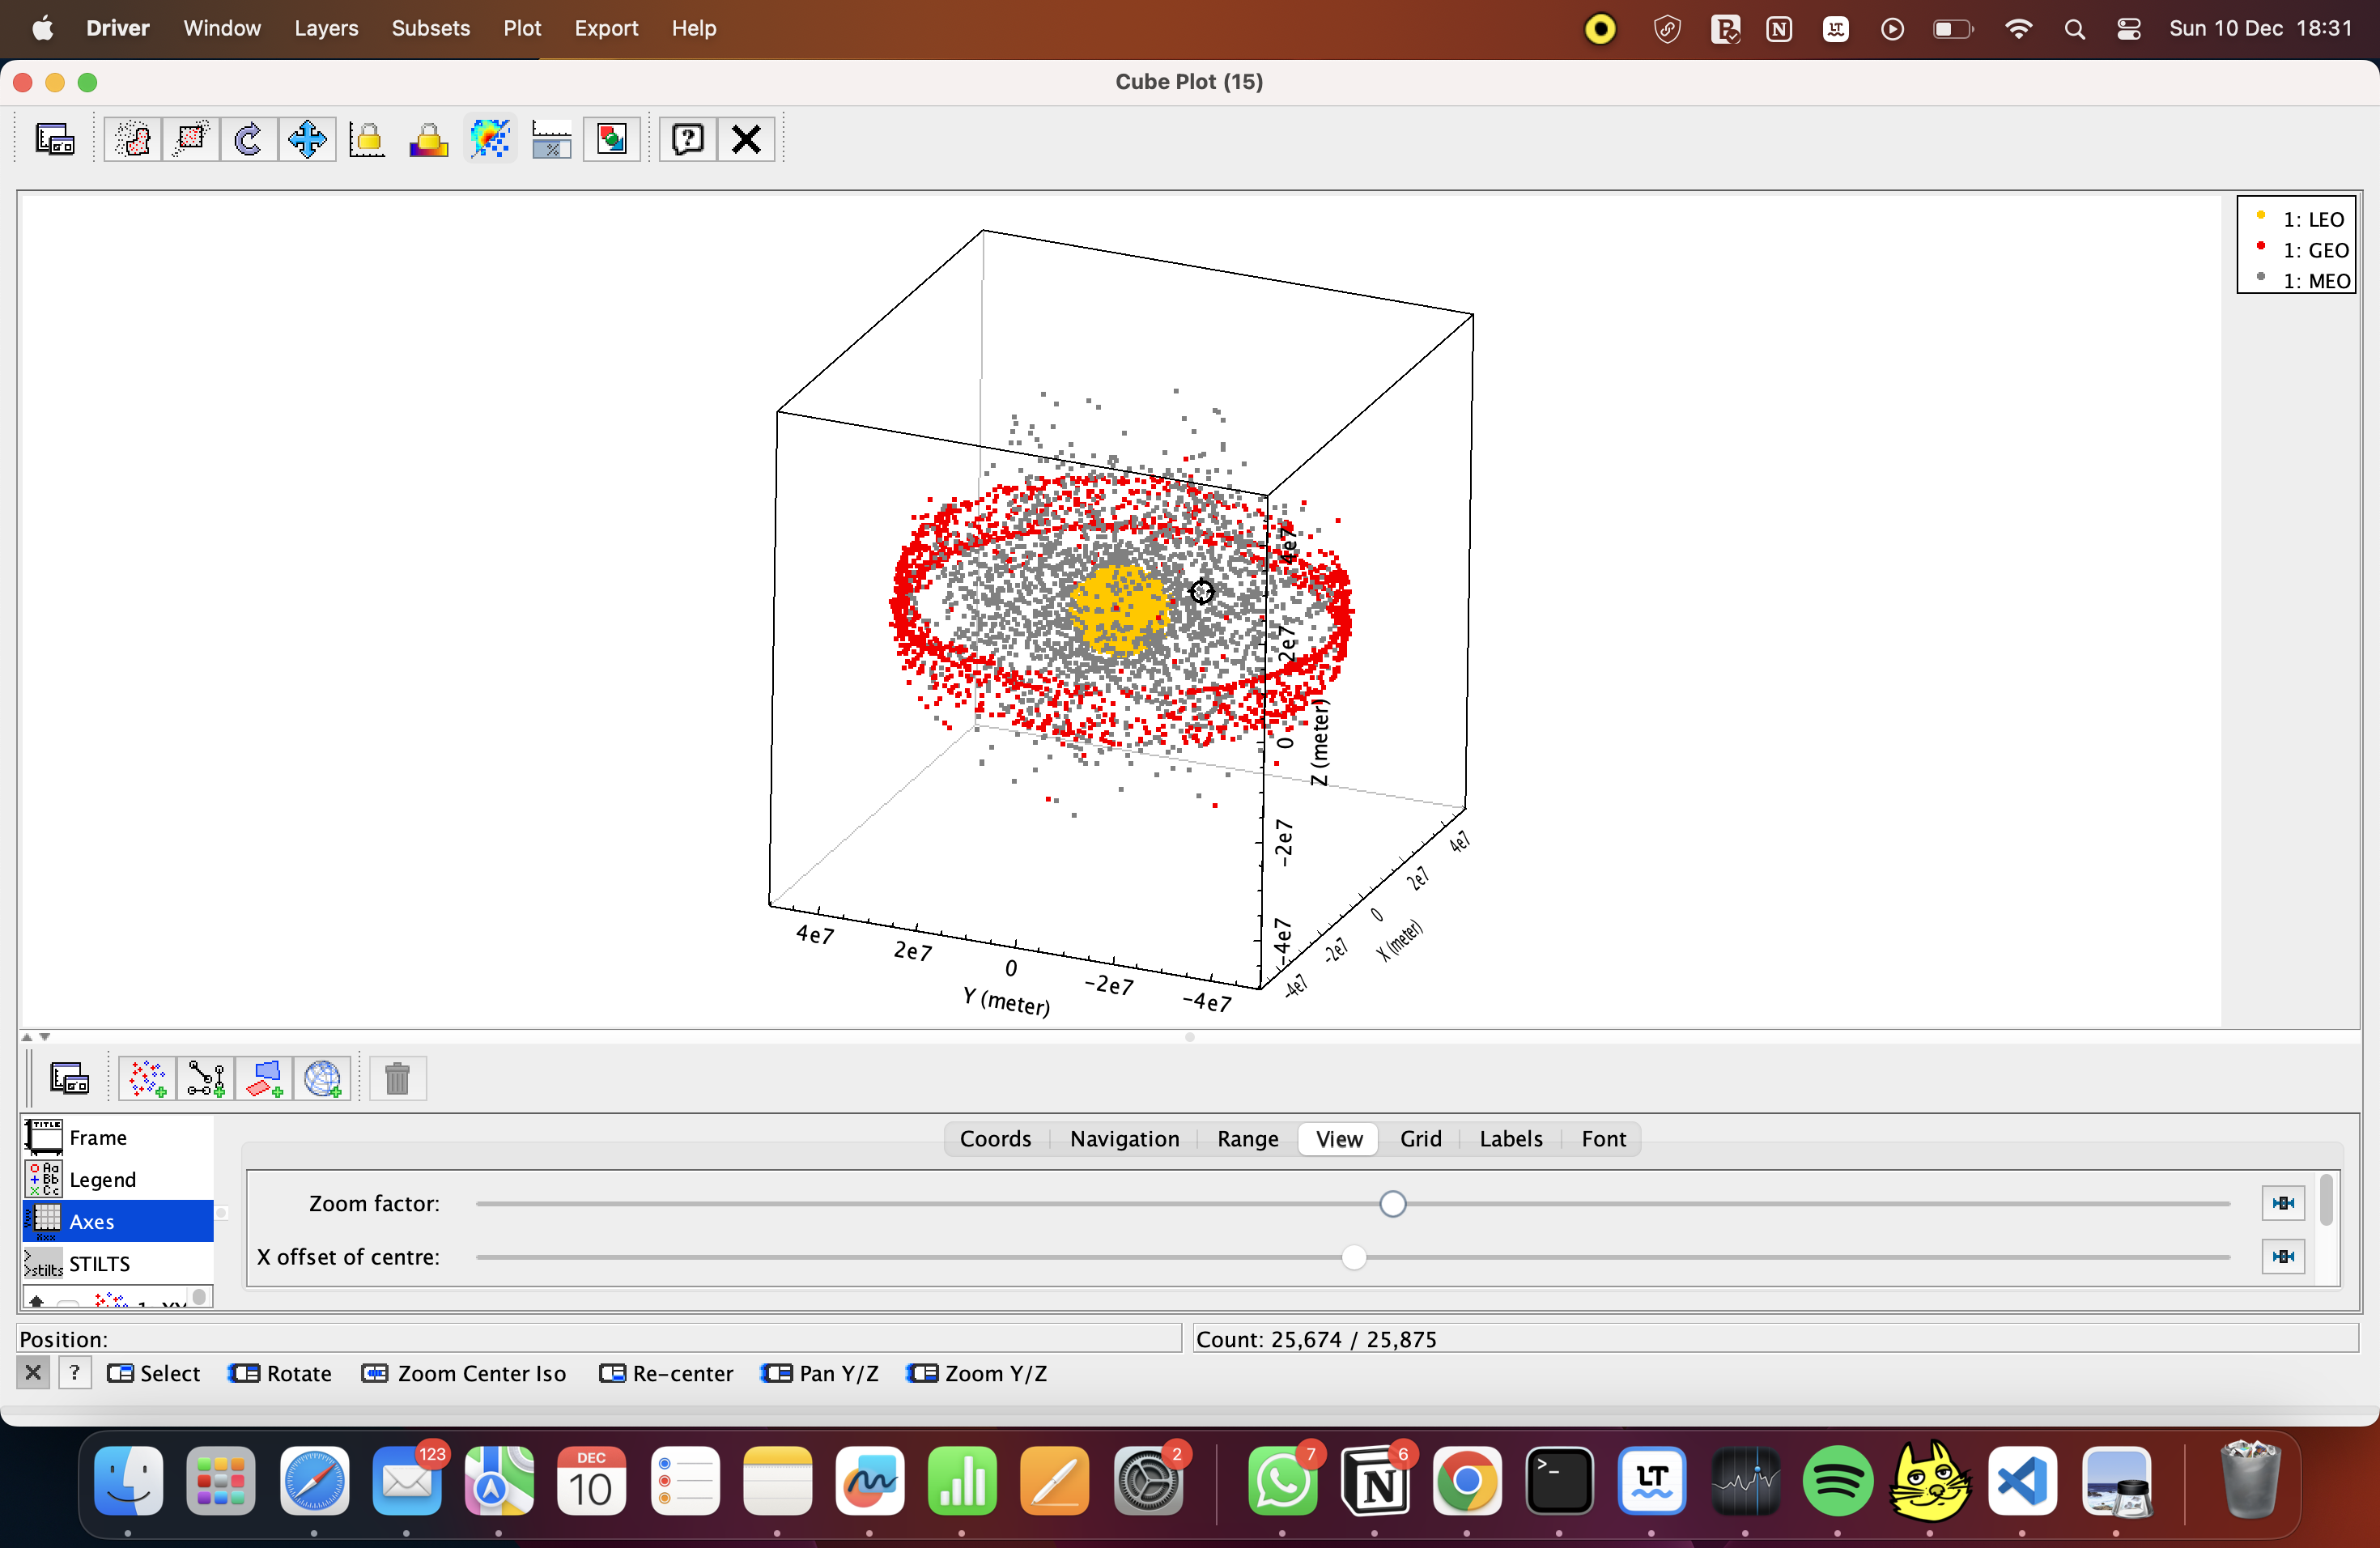

The selection of these three different orbital regions was made by looking at the elevation graph as a function of the z-coordinate (graph on the left).

- For LEO satellites (in blue), a selection was made using the "freehand" tool for points with elevation between approximately zero and 2000 km.

- For GEO satellites (in green), the selection was made using the "freehand" tool for points with elevation between approximately 35000 km and 36000 km.

- For MEO satellites (in grey), a selection was made using the "freehand" tool for points with elevation between approximately 2000 km and 34000 km, i.e. all the satellites between the two other regions.


These orbits can also be seen in the graphic of mean motion as a function of eccentricity (on the right). It was expected that LEO satellites, satellites closer to the earth surface, would have small eccentricities and high mean motion due to their short revolution periods. This expectation was confirmed in the graph, where we can see the points located in the upper-left corner of the graph.

In the case of GEO satellites, it was antecipated that they also should have relatively small eccentricities, since their orbits should be approximately circular with a constant and relatively small mean motion as they have orbit periods of ~1 day. Indeed, looking again at the graph of the mean notion in function of eccentricity, we can verify that but also we can identify some orbits that start to deviate from the perfect circular orbit.

![Screenshot 2023-12-10 at 20.46.40.png](<attachment:Screenshot 2023-12-10 at 20.46.40.png>)
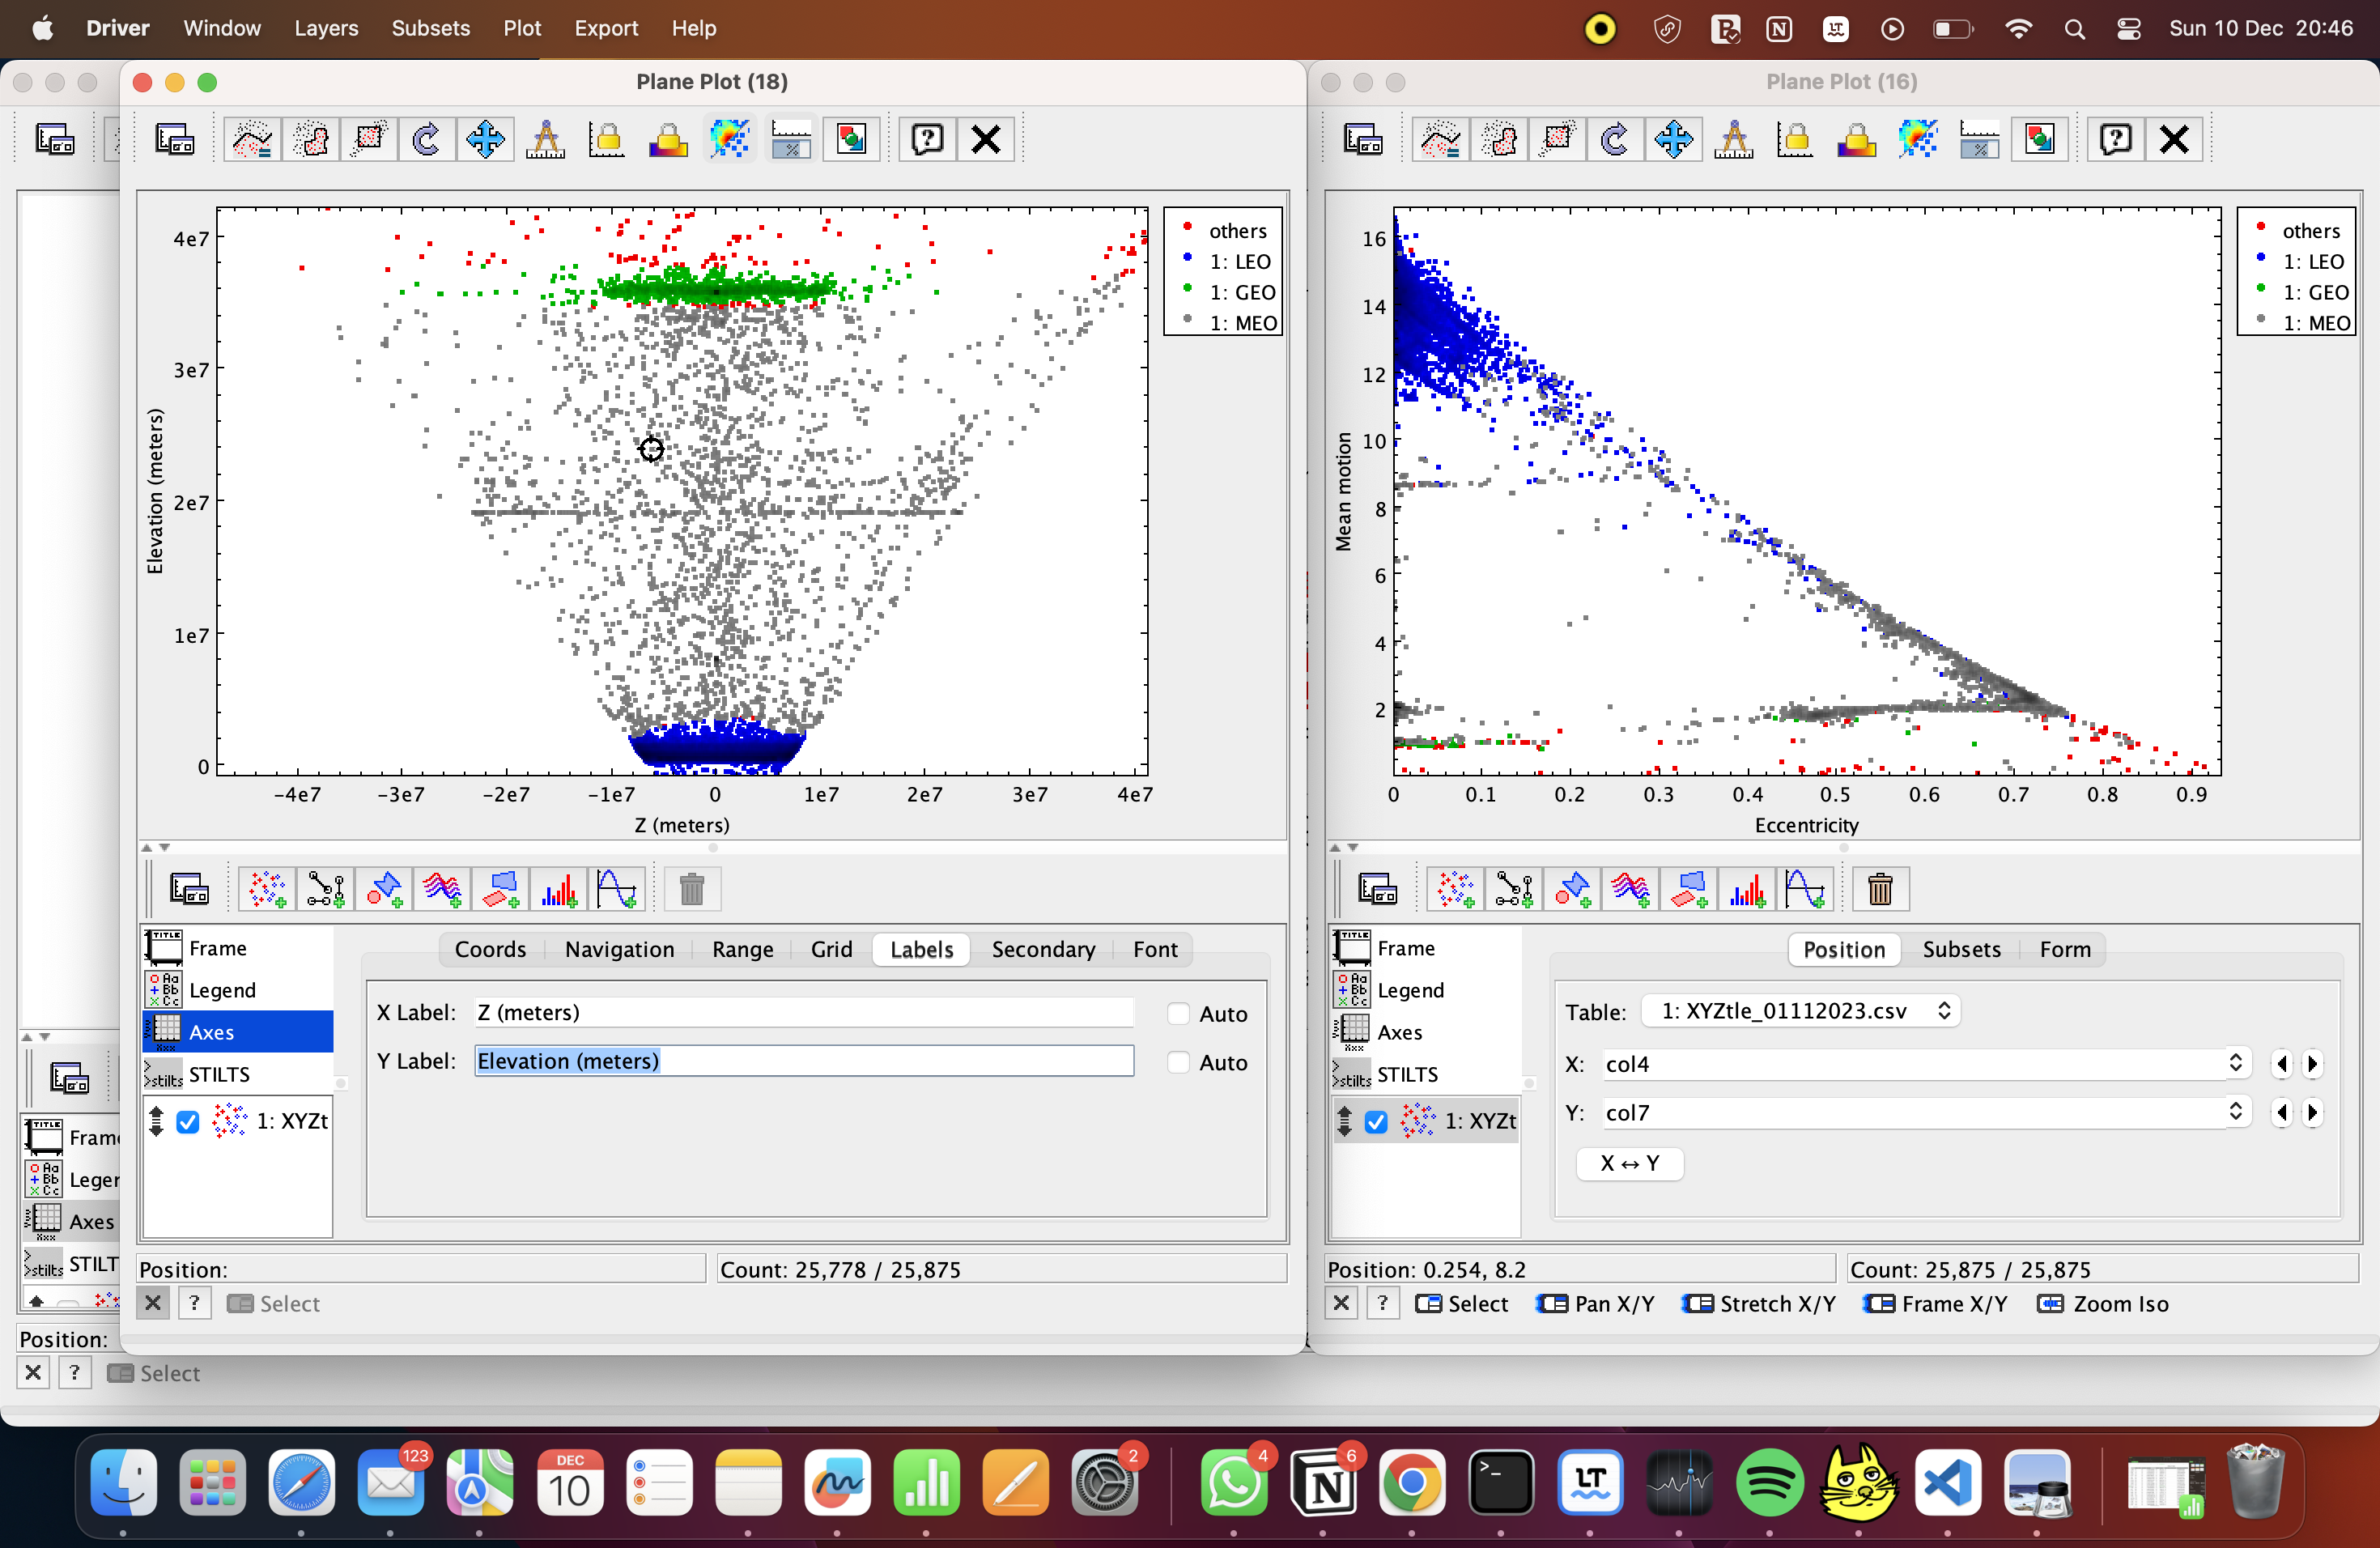